# **Importing Libraries**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_squared_error

# **Load and Check Data**

In [101]:
#data = pd.read_csv("/kaggle/input/fare-amount/final_internship_data.csv")
path =r'X:\/ML\Projects\Fare Amount Project\Dataset\final_internship_data.csv'
data = pd.read_csv(path)

In [102]:
df = data.copy()

In [103]:
df.shape

(500000, 26)

In [104]:
df.head(10)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,Excellent,windy,Flow Traffic,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
7,tT6AJSJx,Alexander Ingram,Christy Hensley,Good,sunny,Congested Traffic,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-1.290694,...,1,2,2012,42.533214,36.829343,16.949505,20.548489,12.449213,4.155444,2.236596
8,D0Yb52vL,Anita Porter,Ana Norton,Excellent,rainy,Dense Traffic,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-1.291656,...,12,0,2012,42.240568,29.608237,23.942272,11.667601,3.637447,1.253232,-1.119470
9,GorULe8F,Monica Smith,Daniel Vargas,Very Good,sunny,Dense Traffic,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-1.291206,...,9,2,2009,42.218767,33.106804,20.538553,16.193381,8.129651,2.849627,0.327463


In [105]:
df.tail(10)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
499990,g1hXROJC,Monique Wade,Jose Stevens,Good,windy,Dense Traffic,2010-09-06 16:29:00.00000086,9.3,2010-09-06 16:29:00,-1.291382,...,9,0,2010,44.490481,34.357058,19.588846,18.970700,11.241682,1.609658,-0.404242
499991,ps7WIS46,Michael Reyes,William Gray,Excellent,rainy,Dense Traffic,2014-05-01 00:14:04.0000004,6.0,2014-05-01 00:14:04,-1.291267,...,5,3,2014,41.852444,32.686389,20.704710,15.442596,7.243390,1.258712,0.324497
499992,BR0jRdAX,Wanda Parks,Richard Jarvis,Very Good,rainy,Dense Traffic,2009-05-30 01:43:00.000000149,16.1,2009-05-30 01:43:00,-1.291621,...,5,5,2009,38.525669,32.191083,24.692609,13.621324,8.050550,7.343098,-2.656809
499993,uKezM6XS,Sarah Lamb,John Hill,Bad,rainy,Flow Traffic,2013-02-18 02:05:13.0000001,19.5,2013-02-18 02:05:13,-1.290649,...,2,0,2013,35.253546,45.766942,10.869932,27.883807,19.840035,7.507478,-2.283101
499994,kWwwOifb,William Sullivan,Linda Davis,Very Good,windy,Congested Traffic,2015-01-24 22:42:08.0000001,13.0,2015-01-24 22:42:08,-1.291337,...,1,5,2015,42.123722,32.557909,20.805410,15.446574,7.285943,1.055295,-3.067213
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817
499999,qGKn4Um5,Eric Jones,Julie King,Very Good,sunny,Flow Traffic,2010-04-12 23:46:58.0000002,4.9,2010-04-12 23:46:58,-1.291312,...,4,0,2010,38.822968,31.517592,23.087427,11.950577,3.873636,1.040272,-2.813690


In [106]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [107]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [108]:
df.describe(include='object')

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,pickup_datetime
count,500000,500000,500000,500000,500000,500000,500000,500000
unique,500000,221675,221700,4,5,3,500000,461206
top,KHVrEVlD,Michael Smith,Michael Smith,Very Good,sunny,Congested Traffic,2009-06-15 17:26:21.0000001,2012-01-26 21:22:00
freq,1,224,257,125312,100433,166847,1,6


# **EDA and Visualization**

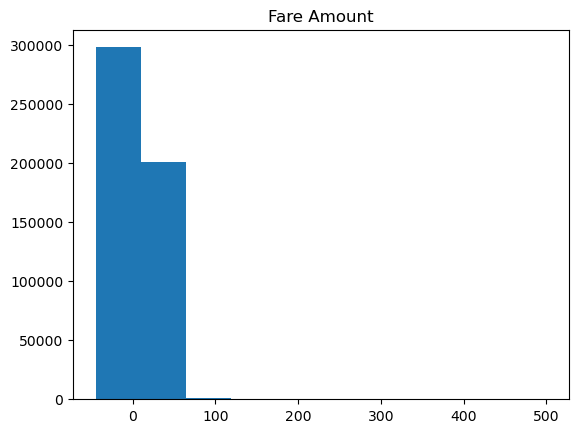

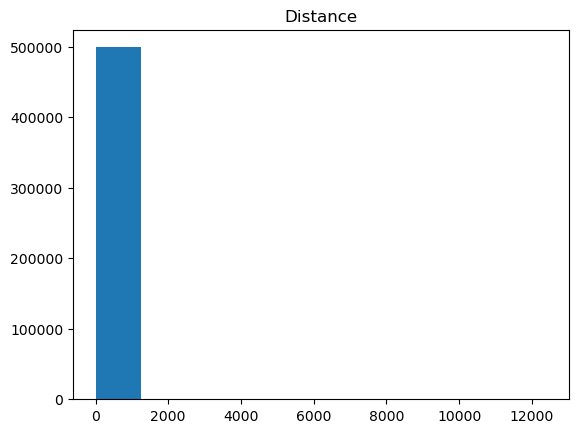

In [109]:
plt.hist(df['fare_amount'])
plt.title('Fare Amount')
plt.show()

plt.hist(df['distance'])
plt.title('Distance')
plt.show()

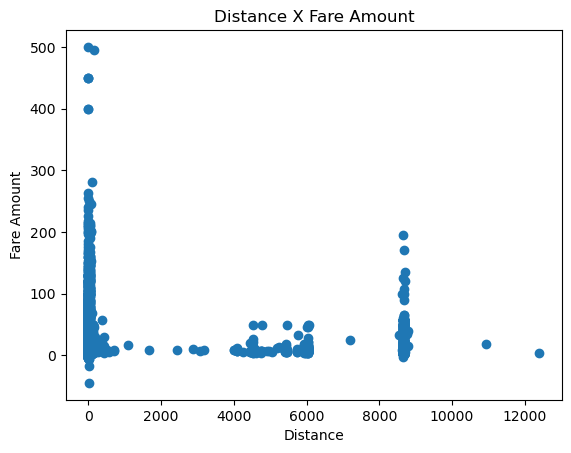

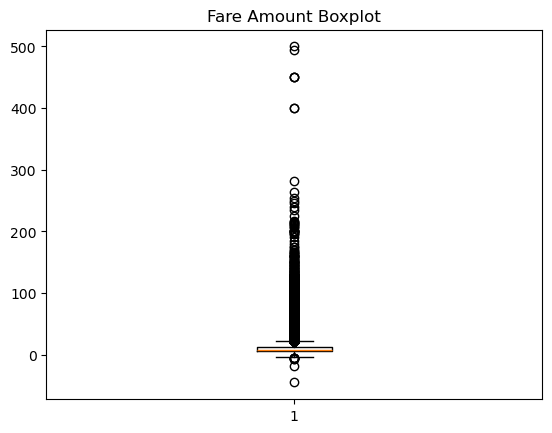

In [110]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title('Distance X Fare Amount')
plt.show()

plt.boxplot(df['fare_amount'])
plt.title('Fare Amount Boxplot')
plt.show()

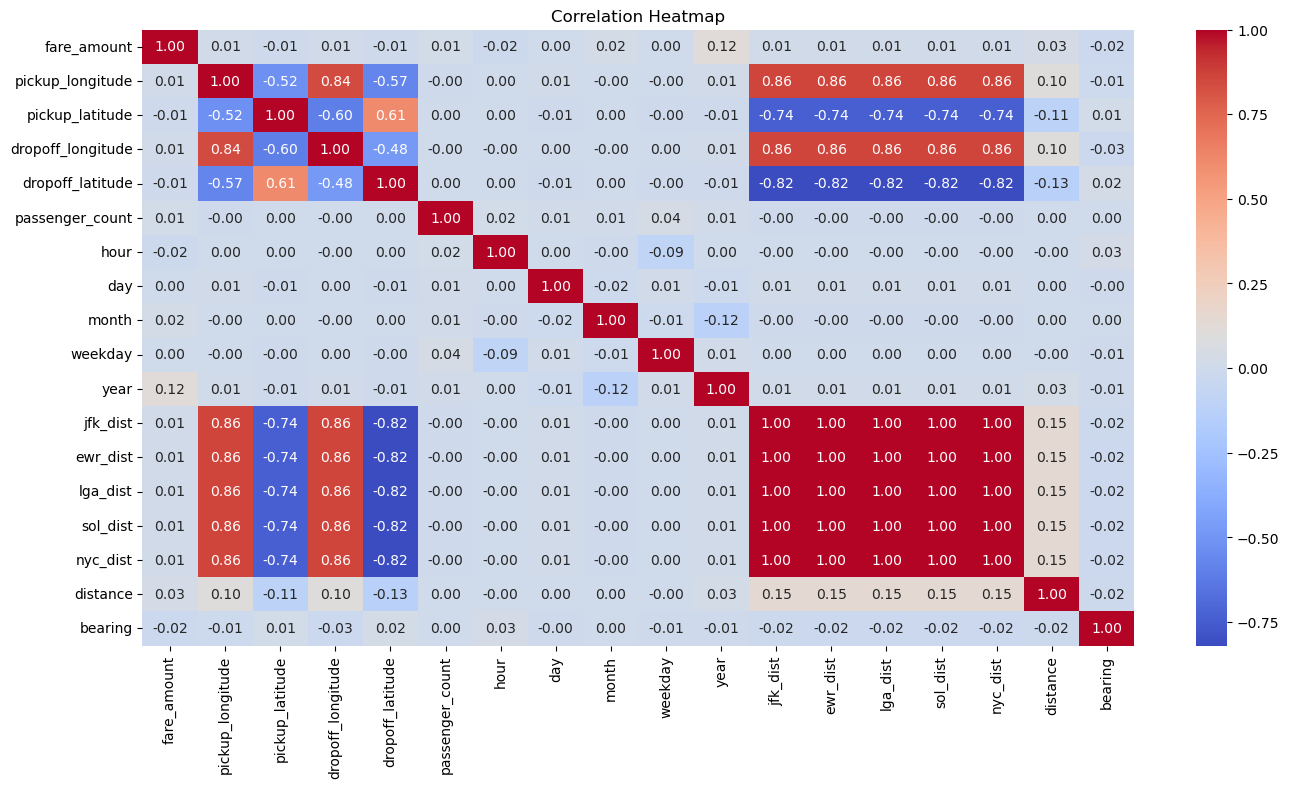

In [111]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [112]:
df['pickup_longitude'].corr(df['dropoff_longitude'])

0.8397809773863321

In [113]:
df['fare_amount'].corr(df['year'])

0.11577763231046283

In [114]:
gb_year_fare = df.groupby('year')['fare_amount'].mean()
print(gb_year_fare)

year
2009    10.018505
2010    10.197785
2011    10.481498
2012    11.157711
2013    12.626578
2014    12.965165
2015    13.027985
Name: fare_amount, dtype: float64


In [115]:
Avg_groupby = df.groupby('fare_amount').mean(numeric_only=True)
display(Avg_groupby)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
fare_amount,,,,,,,,,,,,,,,,,
-44.90,-1.289294,0.711639,-1.285898,0.711866,1.00,23.000000,19.000000,2.000000,4.00,2010.000000,35.323185,69.416037,16.936769,50.232065,42.128955,16.447529,-1.481768
-18.10,-1.290815,0.711401,-1.291728,0.710551,3.00,14.000000,14.000000,3.000000,6.00,2010.000000,41.319186,32.749932,21.183781,14.527132,6.993566,6.983482,2.458397
-6.50,-1.291315,0.710864,-1.291040,0.711258,1.00,6.000000,12.500000,3.000000,4.50,2010.000000,40.657493,33.768340,19.756461,15.943188,7.534838,2.838727,-0.487651
-5.00,-1.291291,0.711289,-1.291250,0.711334,2.75,4.750000,15.750000,3.250000,1.75,2015.000000,43.154816,34.109752,19.586896,17.903116,9.932871,0.908919,0.502728
-4.50,-1.291651,0.711055,-1.291715,0.711026,1.00,0.000000,13.000000,2.000000,4.00,2015.000000,44.564748,29.032099,24.291607,12.791541,5.674678,0.359007,2.096855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.05,-1.287874,0.709366,-1.275679,0.719296,1.00,13.000000,1.000000,9.000000,5.00,2012.000000,87.027624,139.808482,97.935375,121.065758,114.637441,86.299253,-0.744047
400.00,-1.289766,0.712147,-1.289766,0.712147,1.00,6.500000,6.500000,7.500000,4.00,2011.000000,45.216430,54.100674,23.267917,37.030898,29.514152,0.005125,1.169579
450.00,-1.290359,0.711988,-1.290342,0.712022,1.00,14.666667,22.666667,6.666667,4.00,2012.666667,43.064813,46.152735,10.862186,30.546373,22.351905,0.231878,-0.732605


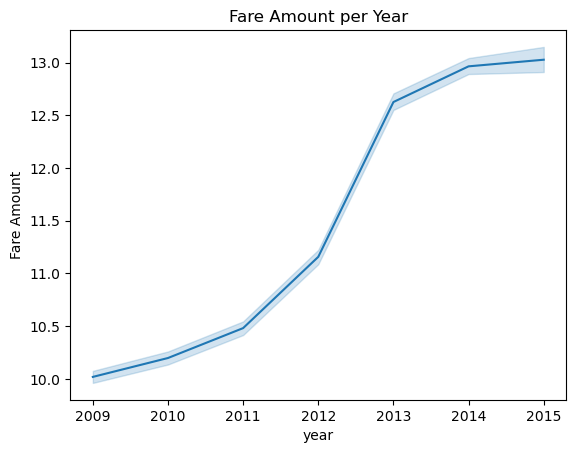

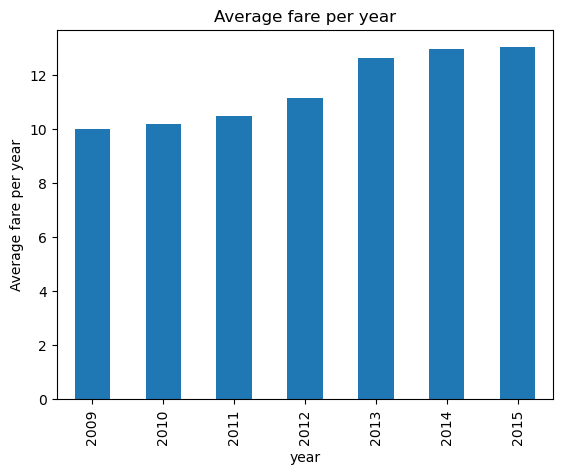

In [116]:
sns.lineplot(x='year', y='fare_amount', data=df)
plt.ylabel('Fare Amount')
plt.title('Fare Amount per Year')
plt.show()

Avg_fare_per_year = df.groupby('year')['fare_amount'].mean().plot(kind='bar')
plt.ylabel('Average fare per year')
plt.title('Average fare per year')
plt.show()

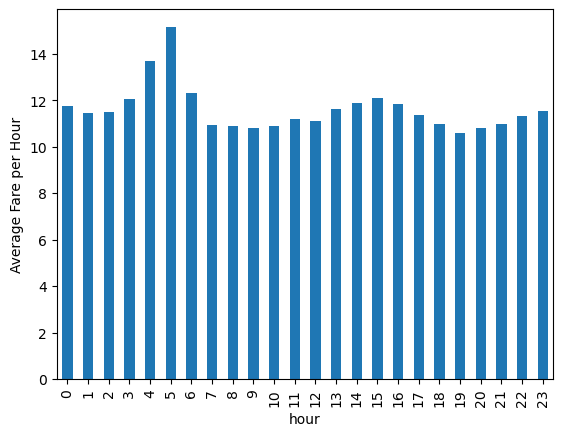

In [117]:
Avg_fare_per_hour = df.groupby('hour')['fare_amount'].mean().plot(kind='bar')
plt.ylabel('Average Fare per Hour')
plt.show()

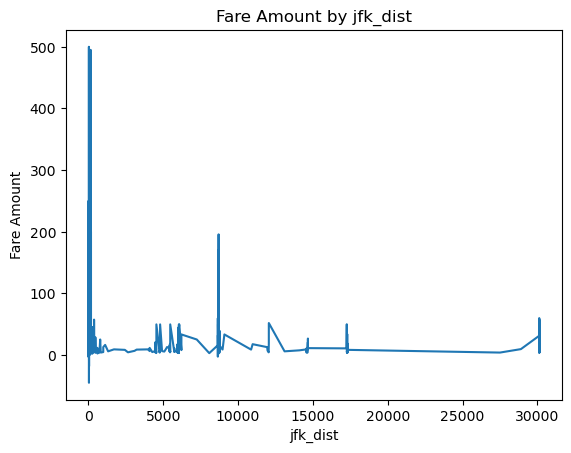

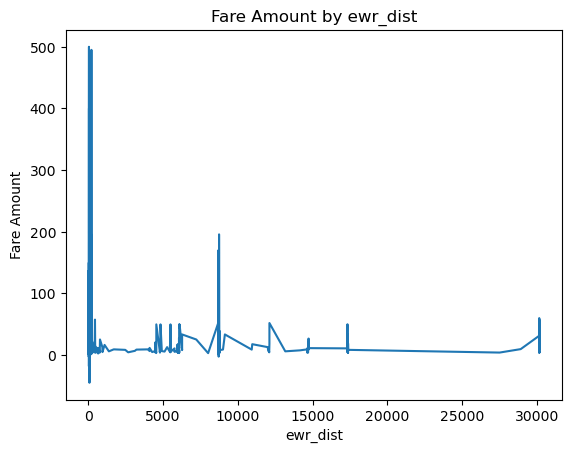

In [118]:
sns.lineplot(x="jfk_dist", y="fare_amount", data=df)
plt.title("Fare Amount by jfk_dist")
plt.xlabel("jfk_dist")
plt.ylabel("Fare Amount")
plt.show()
sns.lineplot(x="ewr_dist", y="fare_amount", data=df)
plt.title("Fare Amount by ewr_dist")
plt.xlabel("ewr_dist")
plt.ylabel("Fare Amount")
plt.show()

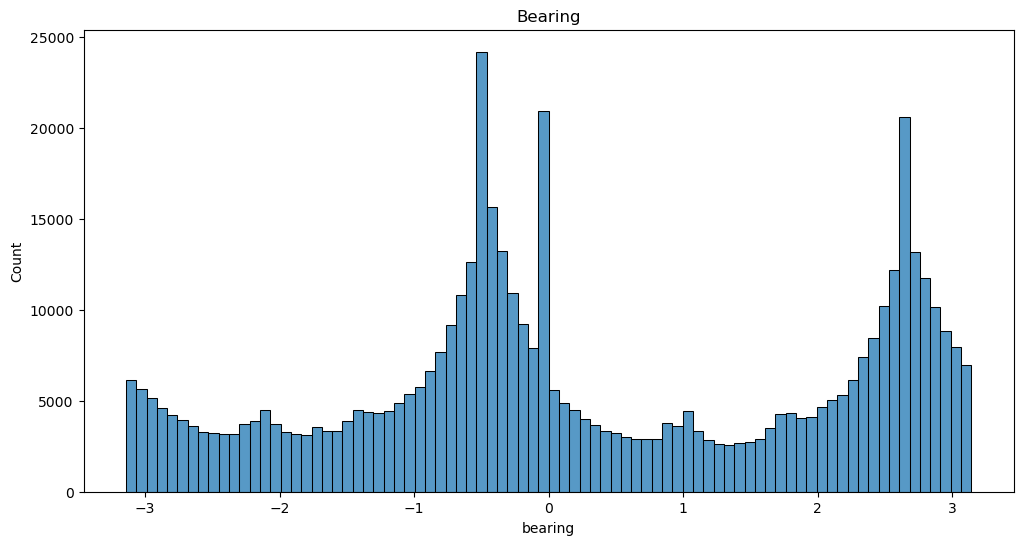

In [119]:
plt.figure(figsize=(12,6))
sns.histplot(df['bearing'])
plt.title("Bearing")
plt.show()

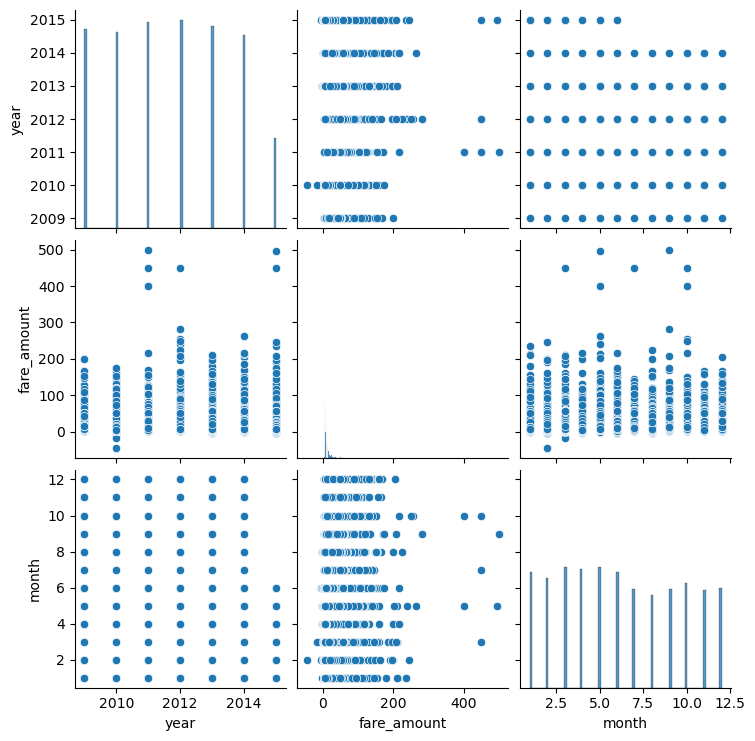

In [120]:
sns.pairplot(df, vars=['year','fare_amount','month'])
plt.show()

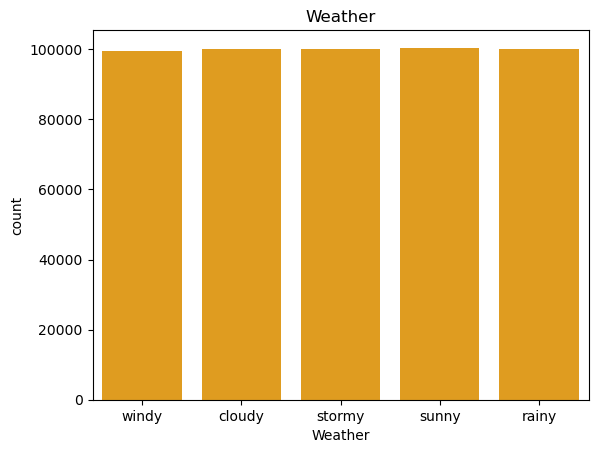

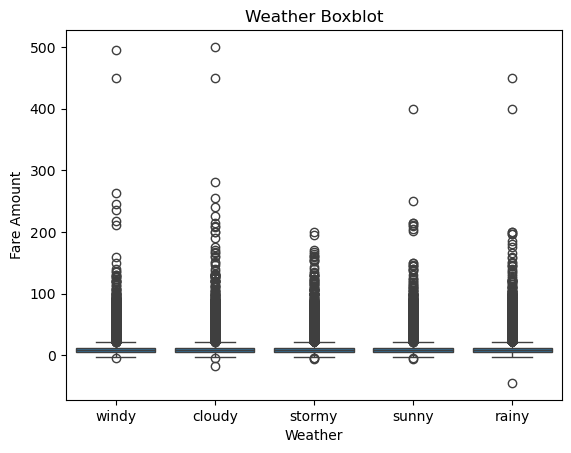

In [121]:
sns.countplot(x='Weather', data=df, color='orange')
plt.title('Weather')
plt.show()

sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.ylabel('Fare Amount')
plt.title('Weather Boxblot')
plt.show()

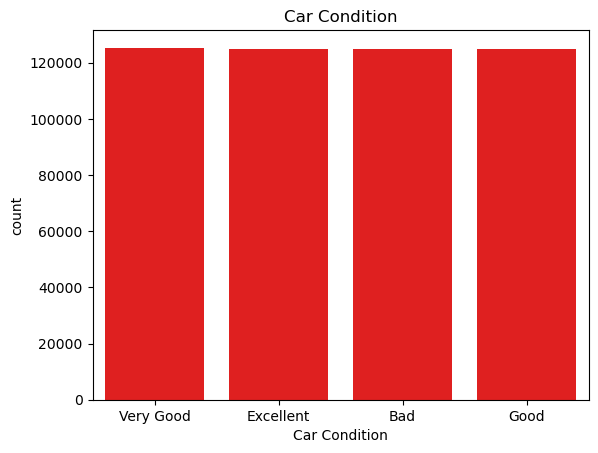

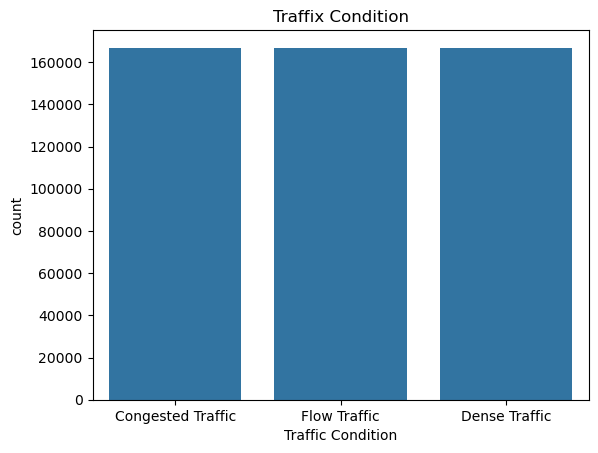

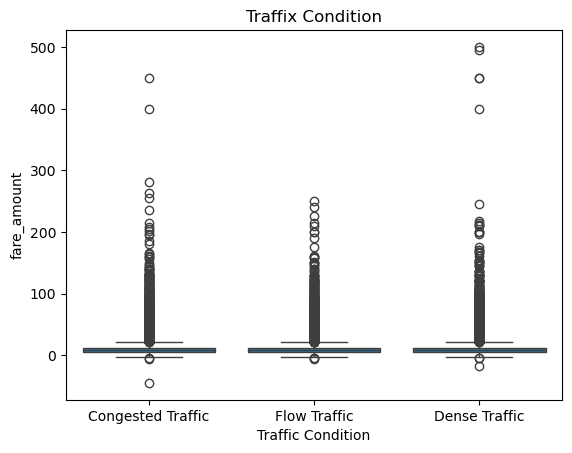

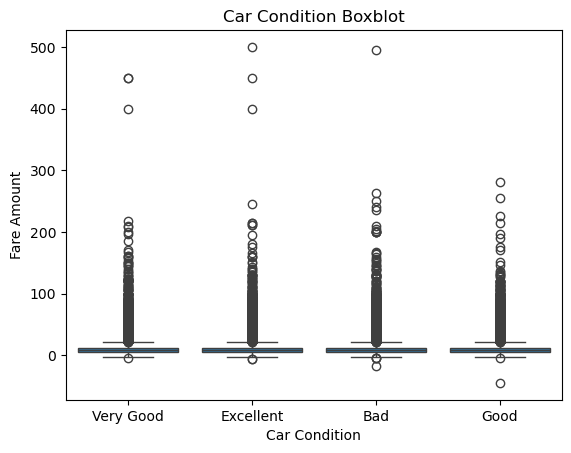

In [122]:
sns.countplot(x='Car Condition', data=df, color='red')
plt.title('Car Condition')
plt.show()

sns.countplot(x='Traffic Condition', data=df)
plt.title('Traffix Condition')
plt.show()

sns.boxplot(x='Traffic Condition',y='fare_amount', data=df)
plt.title('Traffix Condition')
plt.show()

sns.boxplot(x='Car Condition', y='fare_amount', data=df)
plt.ylabel('Fare Amount')
plt.title('Car Condition Boxblot')
plt.show()

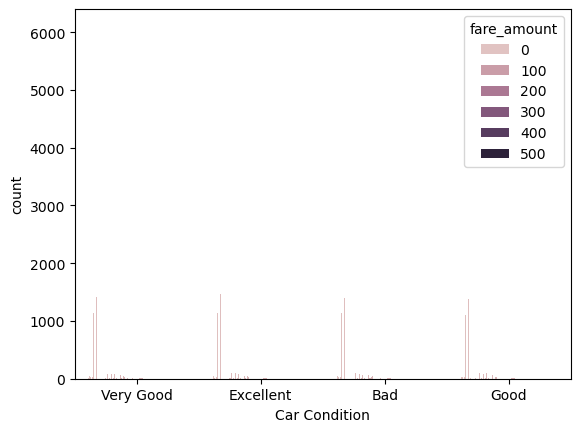

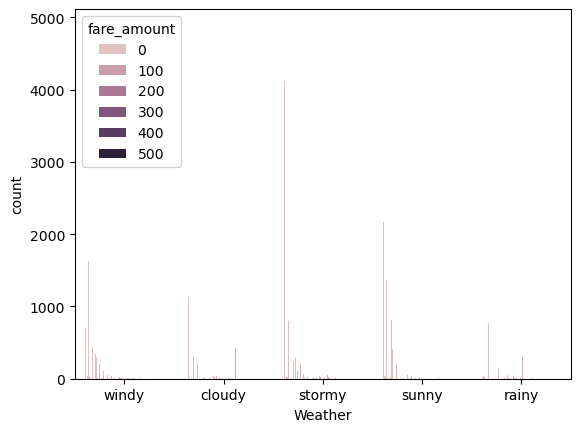

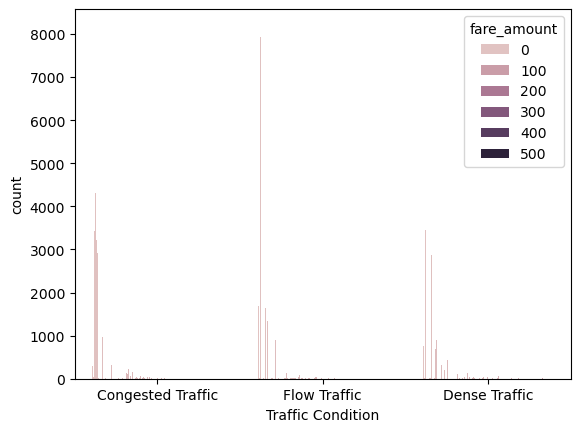

In [123]:
sns.countplot(x='Car Condition',hue='fare_amount', data=df)
plt.show()
sns.countplot(x='Weather',hue='fare_amount', data=df)
plt.show()
sns.countplot(x='Traffic Condition',hue='fare_amount', data=df)
plt.show()

<Figure size 1200x600 with 0 Axes>

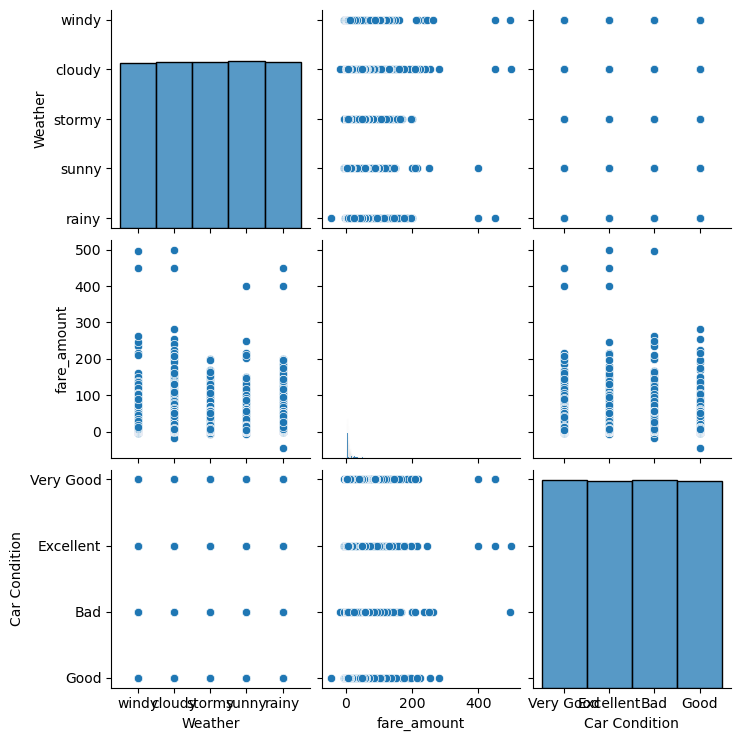

In [124]:
plt.figure(figsize=(12,6))
sns.pairplot(df, vars=['Weather','fare_amount','Car Condition'])
plt.show()

# **Preprocessing And Handling**

**Handling null values**

In [125]:
df.dropna(inplace=True)
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

**Handling Categorical Data**

In [126]:
df['Traffic Condition'].unique(),df['Car Condition'].unique(),df['Weather'].unique()

(array(['Congested Traffic', 'Flow Traffic', 'Dense Traffic'], dtype=object),
 array(['Very Good', 'Excellent', 'Bad', 'Good'], dtype=object),
 array(['windy', 'cloudy', 'stormy', 'sunny', 'rainy'], dtype=object))

In [127]:
# we can drop or keep them , The results will be the same

# df['Weather'] = df['Weather'].map({'windy': 0, 'cloudy' : 1, 'stormy' : 2, 'sunny' : 3 , 'rainy': 4})
# df['Car Condition'] = df['Car Condition'].map({'Very Good': 0, 'Excellent' : 1 , 'Bad' : 2, 'Good' : 3})
# df['Traffic Condition'] = df['Traffic Condition'].map({'Congested Traffic': 0, 'Flow Traffic' : 1 , 'Dense Traffic' : 2})

df.drop(columns=['Traffic Condition', 'Weather', 'Car Condition'], inplace=True)
df = pd.get_dummies(df, columns=['weekday'], prefix='weekday')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   key                499995 non-null  object 
 4   fare_amount        499995 non-null  float64
 5   pickup_datetime    499995 non-null  object 
 6   pickup_longitude   499995 non-null  float64
 7   pickup_latitude    499995 non-null  float64
 8   dropoff_longitude  499995 non-null  float64
 9   dropoff_latitude   499995 non-null  float64
 10  passenger_count    499995 non-null  int64  
 11  hour               499995 non-null  int64  
 12  day                499995 non-null  int64  
 13  month              499995 non-null  int64  
 14  year               499995 non-null  int64  
 15  jfk_dist           499995 non-null  float64
 16  ewr_dis

**Drop Unimportant Feature**

In [129]:
df.drop(columns=['User ID', 'User Name','Driver Name','key','pickup_datetime','passenger_count','sol_dist','nyc_dist','jfk_dist','ewr_dist','lga_dist'], inplace=True)

In [130]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'hour', 'day', 'month', 'year',
       'distance', 'bearing', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

**Limit the Fare amount and Distance in miles**

In [131]:
test_df = df[(df['distance'] > 2) & (df['fare_amount'] > 0)]
price_per_unit = (test_df['fare_amount'] - 2.50) / test_df['distance']

print(f"Average Price Per Unit: ${price_per_unit.median():.2f}")

Average Price Per Unit: $2.39


In [132]:
df = df[df['fare_amount'] > 0.00]
df = df[(df['distance'] > 0) & (df['distance'] <= 150)]

**Handling Outliers Using Z-Score and IQR**

In [133]:
numeric_cols = ['fare_amount','distance']

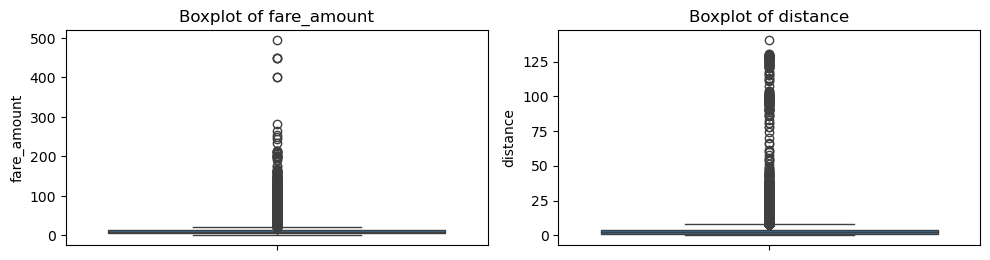

In [134]:
# numeric_cols
plt.figure(figsize=(10, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [135]:
#handling outliers with z-score and iqr

df_zscore = df.copy()
for col in numeric_cols:
    mean = df_zscore[col].mean()
    std = df_zscore[col].std()
    z_scores = (df_zscore[col] - mean) / std
    df_zscore = df_zscore[(np.abs(z_scores) < 3) | (df_zscore[col].isna())]
    print(f"{col}: mean={mean:.2f}, std={std:.2f}")
print("Shape after removing outliers (Z-score):", df_zscore.shape)

df_iqr = df_zscore.copy()
for col in numeric_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_iqr.loc[df_iqr[col] < lower_bound, col] = lower_bound
    df_iqr.loc[df_iqr[col] > upper_bound, col] = upper_bound

print("Shape after removing outliers (IQR):", df_iqr.shape)

fare_amount: mean=11.35, std=9.76
distance: mean=3.01, std=3.17
Shape after removing outliers (Z-score): (466084, 18)
Shape after removing outliers (IQR): (466084, 18)


In [136]:
percent_lost = (1 - (len(df_iqr) / 500000)) * 100
print(f"Data reduction: {percent_lost:.2f}%")

Data reduction: 6.78%


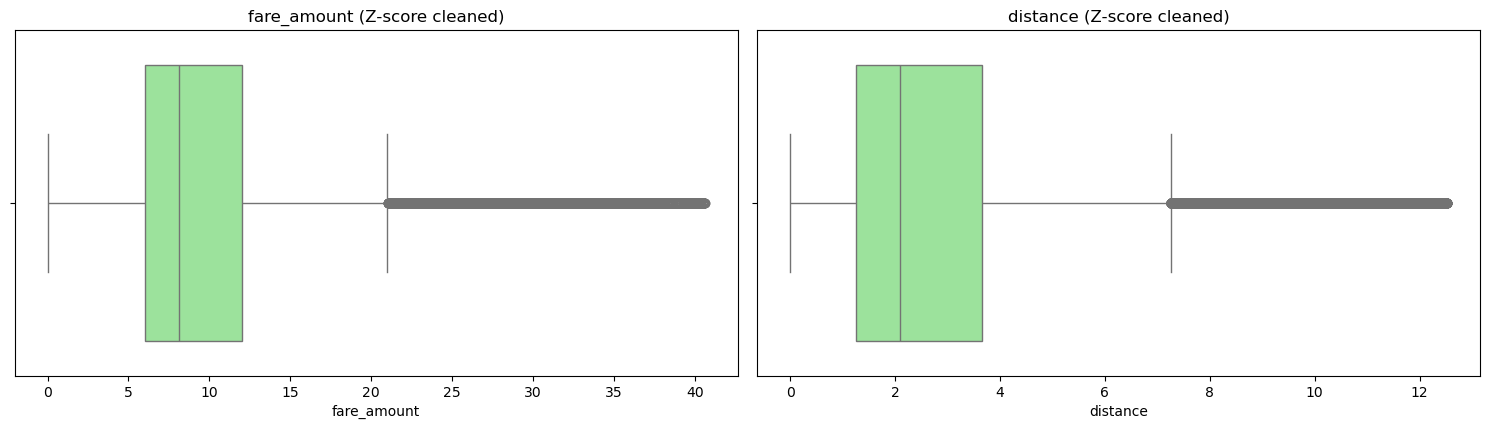

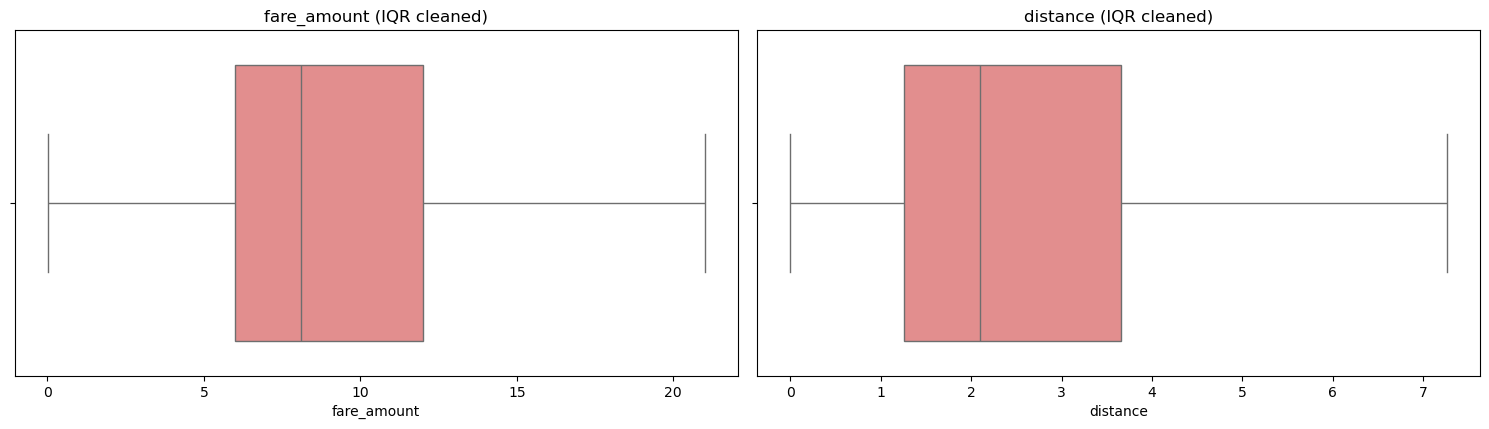

In [137]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_zscore[col], color="lightgreen")
    plt.title(f'{col} (Z-score cleaned)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_iqr[col], color="lightcoral")
    plt.title(f'{col} (IQR cleaned)')
plt.tight_layout()
plt.show()

In [138]:
df_iqr.duplicated().sum()

0

# **Training**

In [139]:
x= df_iqr.drop(columns=['fare_amount'])
y =df_iqr['fare_amount']
print(x.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0         -1.288826         0.710721          -1.288779          0.710563   
1         -1.291824         0.710546          -1.291182          0.711780   
2         -1.291242         0.711418          -1.291391          0.711231   
3         -1.291319         0.710927          -1.291396          0.711363   
4         -1.290987         0.711536          -1.290787          0.711811   

   hour  day  month  year  distance   bearing  weekday_0  weekday_1  \
0    17   15      6  2009  1.030764 -2.918897       True      False   
1    16    5      1  2010  7.263904 -0.375217      False       True   
2     0   18      8  2011  1.389525  2.599961      False      False   
3     4   21      4  2012  2.799270  0.133905      False      False   
4     7    9      3  2010  1.999157 -0.502703      False       True   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0      False      False      False      False      

In [140]:
print("Shape of X:", x.shape)

Shape of X: (466084, 17)


In [141]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Modeling**

**Linear Regression**

In [142]:
ln_model = LinearRegression()
ln_model.fit(x_train_scaled, y_train)

LinearRegression()

In [143]:
y_pred_ln = ln_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_ln)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ln))
r2 = r2_score(y_test, y_pred_ln)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.58
Root Mean Squared Error (RMSE): 2.27
R² Score: 0.7760


**KNN**

In [144]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [145]:
y_pred_knn = knn_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2 = r2_score(y_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.67
Root Mean Squared Error (RMSE): 2.40
R² Score: 0.7486


In [146]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(x_train_scaled,y_train)

y_pred_knn = knn_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2 = r2_score(y_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.62
Root Mean Squared Error (RMSE): 2.33
R² Score: 0.7627


In [147]:
knn_model = KNeighborsRegressor(n_neighbors=21)
knn_model.fit(x_train_scaled,y_train)

y_pred_knn = knn_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2 = r2_score(y_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.52
Root Mean Squared Error (RMSE): 2.19
R² Score: 0.7918


**Random Forest**

In [148]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=120 ,n_jobs=-1 ,random_state=42)
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor(n_estimators=120, n_jobs=-1, random_state=42)

In [149]:
y_pred_rf = rf_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.24
Root Mean Squared Error (RMSE): 1.89
R² Score: 0.8440


In [150]:
for n in [50, 200]:
    reg = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    reg.fit(x_train_scaled, y_train)
    y_pred_reg = reg.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print("MAE:", mean_absolute_error(y_test, y_pred_reg))

Root Mean Squared Error: 1.90
MAE: 1.247640447123946
Root Mean Squared Error: 1.89
MAE: 1.234455299405694


**XGBoost**

In [151]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=800 ,learning_rate=0.05, max_depth=8, n_jobs=-1, random_state=42)
xgb_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=-1, num_parallel_tree=None, ...)

In [152]:
y_pred_xgb = xgb_model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.11
Root Mean Squared Error (RMSE): 1.77
R² Score: 0.8636


In [153]:
y_train_pred = xgb_model.predict(x_train_scaled) 
y_test_pred = xgb_model.predict(x_test_scaled)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("--- Model Performance ---")
print(f"Train MAE: {train_mae:.2f}  |  Test MAE: {test_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f} |  Test RMSE: {test_rmse:.2f}")
print(f"Train R²:   {train_r2:.4f}   |  Test R²:   {test_r2:.4f}")

--- Model Performance ---
Train MAE: 0.99  |  Test MAE: 1.11
Train RMSE: 1.52 |  Test RMSE: 1.77
Train R²:   0.9000   |  Test R²:   0.8636


# **Deployment**

In [ ]:
feature_order = x.columns.tolist()
feature_order

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'hour', 'day', 'month', 'year', 'distance',
       'bearing', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [ ]:
# Saving the trained model
import pickle
with open('Fare_Amount_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [ ]:
#Saving the Preprocessing
import pickle
with open('model_preprocessing.pkl', 'wb') as f:
    pickle.dump({
        'scaler':scaler,
        'feature_order' :feature_order
    },f)